# Looking into a DL3 file
from https://gitlab.pic.es/magic_dl3/crab_dl3_validation/-/blob/main/data/dl3/single_offset/20131004_05029747_DL3_CrabNebula-W0.40+035.fits

In [79]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from gammapy.irf import load_irf_dict_from_file
from pathlib import Path
import seaborn as sns
import pandas as pd
from gammapy.data import DataStore

import warnings
import logging
from contextlib import contextmanager

sns.set()

In [80]:
@contextmanager
def suppress_warnings_and_logs():
    logging.disable(logging.WARNING)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield
    logging.disable(logging.NOTSET)

In [3]:
crab_dataset = "/Users/jarred/Documents/Work/gravitational_wave_toy/notebooks/gammapy/single_offset"

In [4]:
ds = DataStore.from_dir(crab_dataset)

In [5]:
ds.info()

Data store:
HDU index table:
BASE_DIR: /Users/jarred/Documents/Work/gravitational_wave_toy/notebooks/gammapy/single_offset
Rows: 490
OBS_ID: 5029747 -- 5032069
HDU_TYPE: ['aeff', 'edisp', 'events', 'gti', 'rad_max']
HDU_CLASS: ['aeff_2d', 'edisp_2d', 'events', 'gti', 'rad_max_2d']


Observation table:
Observatory name: 'N/A'
Number of observations: 98



In [6]:
observations = ds.get_observations(required_irf="point-like", skip_missing=True)
obs = observations[0]

In [7]:
obs.events.table

EVENT_ID,TIME,RA,DEC,ENERGY
,s,deg,deg,TeV
int64,float64,float32,float32,float32
2402,333778852.5099249,84.59457,22.03088,0.18194601
2408,333778852.5267153,84.21462,23.44914,0.08397394
2434,333778852.61315054,83.524704,22.725792,0.10596932
2445,333778852.6690142,83.76957,22.451006,0.19733498
2478,333778852.7627939,83.478516,23.484594,0.08522219
2481,333778852.7778549,83.71517,21.985115,1.0020943
2513,333778852.8644467,82.421196,22.567652,0.14374068
2544,333778852.9826064,83.64136,22.041315,0.10316629


'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.


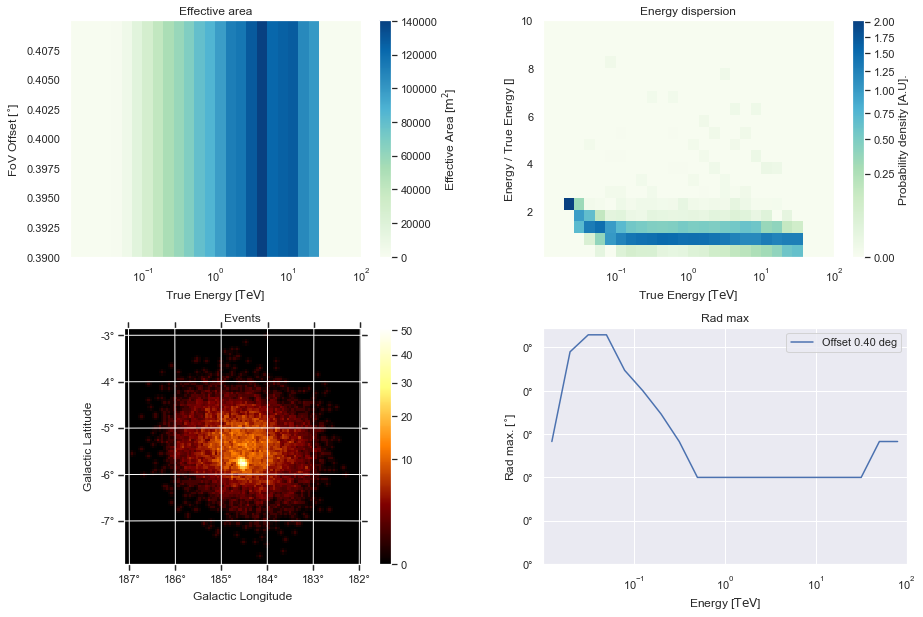

In [61]:
obs.peek()

In [57]:
all_alts = [
    o.obs_info for o in observations
]

# make info df
df = pd.DataFrame(all_alts)
# save indicies for later
df["idx"] = df.index
df.set_index("OBS_ID")
df["ZENITH"] = 90 - df["ALT_PNT"]
df["zenith_idx"] = df["ZENITH"].rank(method="first")
df.sort_values("ZENITH", inplace=True)


zenith range: 6.7º - 49.2º


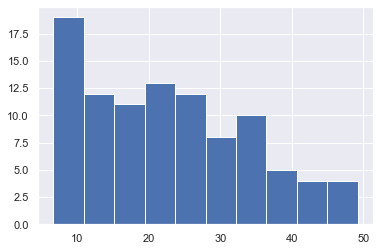

In [58]:
df.ZENITH.hist()
# print range of zeniths
print(f"zenith range: {round(df.ZENITH.min(), 1)}º - {round(df.ZENITH.max(), 1)}º")


# compare IRFs of different zeniths

In [109]:
with suppress_warnings_and_logs():

    # Find the highest and lowest zenith runs
    for i in range(len(df) - 1):
        current_row = df.iloc[i]
        next_row = df.iloc[i + 1]
        # print(current_row.OBS_ID, next_row.OBS_ID)
        
        # Get the OBS_IDs of the highest and lowest zenith runs
        current_zenith_idx = int(current_row['idx'])
        next_zenith_idx = int(next_row['idx'])
        print(current_zenith_idx, next_zenith_idx)
        
        # Get the IRFs of the highest and lowest zenith runs
        current_zd_obs = observations[current_zenith_idx]
        next_zd_obs = observations[next_zenith_idx]
        
        # Round the zenith values to one digit
        current_zenith = round(current_row['ZENITH'], 1)
        next_zenith = round(next_row['ZENITH'], 1)
        
        # Compare the IRFs
        irf_comparisons = {}
        for irf in current_zd_obs.available_irfs:
            irf_comparisons[irf] = getattr(current_zd_obs, irf) == getattr(next_zd_obs, irf)
            
        # print all comparisons in one line
        print(f"{current_zenith}º vs {next_zenith}º {irf_comparisons}")
        
            
        print("---")


16 4
6.7º vs 6.8º {'aeff': True, 'edisp': True, 'rad_max': True}
---
4 42
6.8º vs 7.1º {'aeff': True, 'edisp': True, 'rad_max': True}
---
42 70
7.1º vs 7.1º {'aeff': True, 'edisp': True, 'rad_max': True}
---
70 33
7.1º vs 7.1º {'aeff': True, 'edisp': True, 'rad_max': True}
---
33 27
7.1º vs 7.3º {'aeff': True, 'edisp': True, 'rad_max': True}
---
27 34
7.3º vs 7.5º {'aeff': True, 'edisp': True, 'rad_max': True}
---
34 71
7.5º vs 7.6º {'aeff': True, 'edisp': True, 'rad_max': True}
---
71 43
7.6º vs 7.6º {'aeff': True, 'edisp': True, 'rad_max': True}
---
43 21
7.6º vs 8.2º {'aeff': True, 'edisp': True, 'rad_max': True}
---
21 15
8.2º vs 8.4º {'aeff': True, 'edisp': True, 'rad_max': True}
---
15 3
8.4º vs 8.5º {'aeff': True, 'edisp': True, 'rad_max': True}
---
3 52
8.5º vs 8.8º {'aeff': False, 'edisp': False, 'rad_max': True}
---
52 72
8.8º vs 9.4º {'aeff': False, 'edisp': False, 'rad_max': True}
---
72 44
9.4º vs 9.4º {'aeff': False, 'edisp': False, 'rad_max': True}
---
44 41
9.4º vs 9.5º